In [1]:
import pandas as pd

In [2]:
stack_overflow = pd.read_feather('data/stack_overflow.feather')
stack_overflow.head()

respondent                                        main_branch hobbyist  \
0        36.0  I am not primarily a developer, but I write co...      Yes   
1        47.0                     I am a developer by profession      Yes   
2        69.0                     I am a developer by profession      Yes   
3       125.0  I am not primarily a developer, but I write co...      Yes   
4       147.0  I am not primarily a developer, but I write co...       No   

    age  age_1st_code age_first_code_cut comp_freq  comp_total  \
0  34.0          30.0              adult    Yearly     60000.0   
1  53.0          10.0              child    Yearly     58000.0   
2  25.0          12.0              child    Yearly    550000.0   
3  41.0          30.0              adult   Monthly    200000.0   
4  28.0          15.0              adult    Yearly     50000.0   

   converted_comp         country  ...          survey_length trans  \
0         77556.0  United Kingdom  ...  Appropriate in length    No   
1         74970.0  United Kingdom  ...  Appropriate in length    No   
2        594539.0          France  ...              Too short    No   
3       2000000.0   United States  ...  Appropriate in length    No   
4         37816.0          Canada  ...  Appropriate in length    No   

                                     undergrad_major  \
0  Computer science, computer engineering, or sof...   
1  A natural science (such as biology, chemistry,...   
2  Computer science, computer engineering, or sof...   
3                                               None   
4  Another engineering discipline (such as civil,...   

  webframe_desire_next_year webframe_worked_with  \
0          Express;React.js     Express;React.js   
1              Flask;Spring         Flask;Spring   
2              Django;Flask         Django;Flask   
3                      None                 None   
4                      None        Express;Flask   

                            welcome_change work_week_hrs years_code  \
0  Just as welcome now as I felt last year          40.0        4.0   
1  Just as welcome now as I felt last year          40.0       43.0   
2  Just as welcome now as I felt last year          40.0       13.0   
3  Just as welcome now as I felt last year          40.0       11.0   
4  Just as welcome now as I felt last year          40.0        5.0   

  years_code_pro      age_cat  
0            3.0  At least 30  
1           28.0  At least 30  
2            3.0     Under 30  
3           11.0  At least 30  
4            3.0     Under 30  

[5 rows x 63 columns]

# 1. Z-test

## Hyothesis:
### The mean annual compensation of the population of data scientists is 110,000 dollars

In [3]:
mena_comp_samp = stack_overflow['converted_comp'].mean()
mena_comp_samp

119574.71738168952

## Is the different meaningfull??

In [4]:
import numpy as np
so_boot_dist = []
for i in range(5000):
    so_boot_dist.append(
        np.mean(
        stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
    )

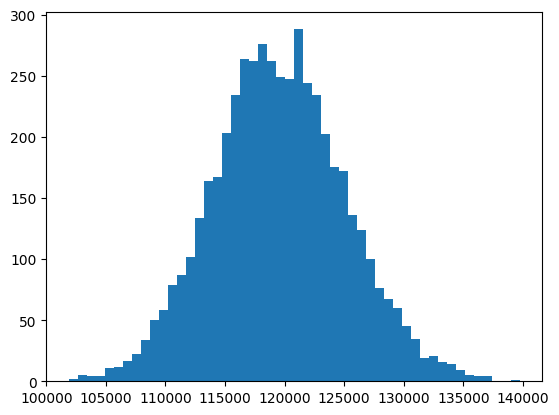

In [6]:
import matplotlib.pyplot as plt
plt.hist(so_boot_dist, bins=50)
plt.show()

In [9]:
std_error = np.std(so_boot_dist, ddof=1)
std_error # std

5548.064992611816

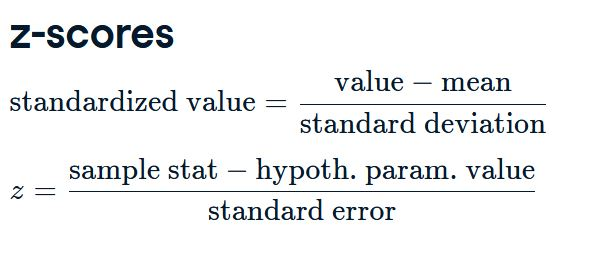

In [12]:
from PIL import Image 
from IPython.display import display
img = Image. open('z.jpg')
display(img)

In [13]:
mean_comp_hyp= 11000

In [14]:
z_score = (mena_comp_samp-mean_comp_hyp)/std_error
z_score

19.569835163480434

## 19.56..... Is that a big or small number? 

# p-values

### Previous research suggests that 35 % of software developers programmed as children (less than 14 years old)

- Ho = The proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. 
- Ha = The proportion of data scientists that started programming as children percentage is greater than 35
- right-tailed test

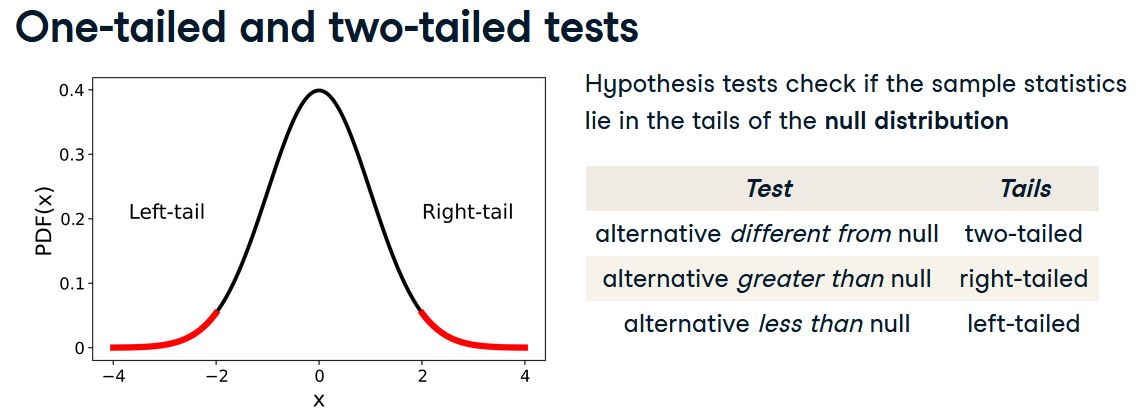

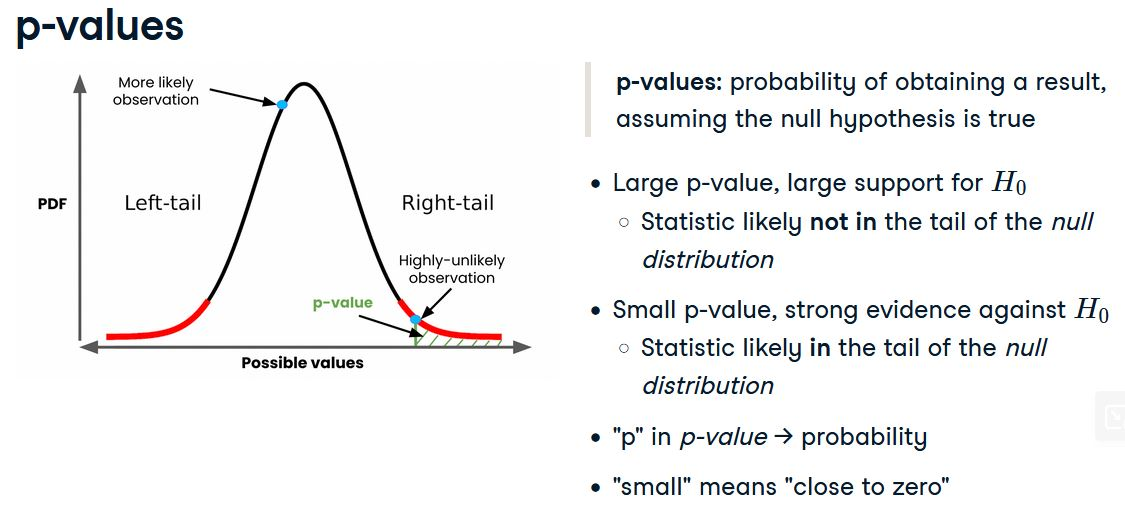

In [16]:
from PIL import Image 
from IPython.display import display
img = Image. open('pvalue.jpg')
display(img)

In [19]:
prop_child_samp = (stack_overflow['age_first_code_cut']=='child').mean()
prop_child_samp

0.39141972578505085

In [20]:
prop_child_hyp = 0.35

In [22]:
import numpy as np
so_boot_dist_child = []
for i in range(5000):
    so_boot_dist_child.append(
        np.mean(
        (stack_overflow['age_first_code_cut']=='child').sample(frac=1, replace=True)
        )
    )

In [23]:
std_error_child = np.std(so_boot_dist_child, ddof=1)
std_error_child # std

0.010218408054784574

In [24]:
z_score_child = (prop_child_samp-prop_child_hyp)/std_error_child
z_score_child

4.05344213726686

In [26]:
from scipy.stats import norm
p_value = 1-norm.cdf(z_score_child,0,1)
p_value

2.5234743684321437e-05

## Statistical significance - making decision

In [28]:
alpha = 0.05

In [29]:
p_value <= alpha

True

### Reject Ho in favor of Ha

## Confidence intervals
confidence interval = 1-alpha

In [32]:
confidence_interval = 1- alpha
confidence_interval

0.95

In [33]:
import numpy as np
lower = np.quantile(so_boot_dist_child, 0.025)
upper = np.quantile(so_boot_dist_child, 0.975)
print(lower,upper)

0.3715170278637771 0.41132242370632466


The interval provides a range of plausible values for the population proportion of data scientists that programmed as children. 

Confidenct intervals confirms that the proportion of data scientists that started programming as children percentage is greater than 35, as CI starts from 37%

# 2. Performing t-tests

Student's t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not.

- Ho = The mean compensation (in USD) is the same for the two groups(child and adult)
- Ha = The mean compensation (in USD) for users who started coding as children is greater than for users who started coding as adults. 

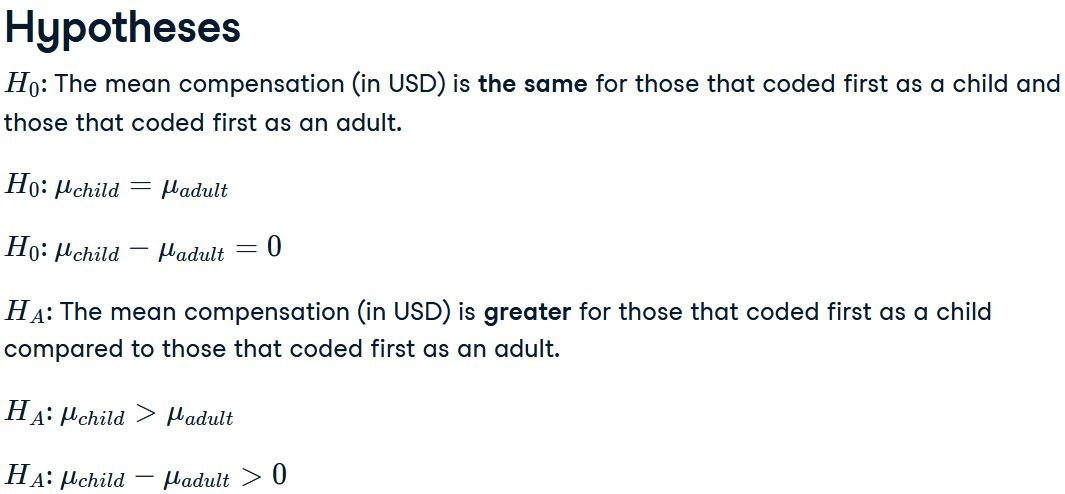

In [35]:
from PIL import Image 
from IPython.display import display
img = Image. open('mu.jpg')
display(img)

In [36]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

Is that increase statistically significant or could it be explained by sampling variability? 

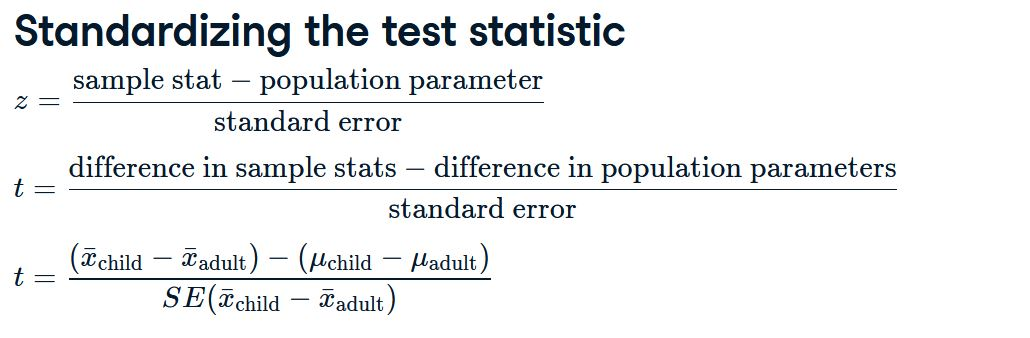

In [37]:
from PIL import Image 
from IPython.display import display
img = Image. open('t-test.jpg')
display(img)

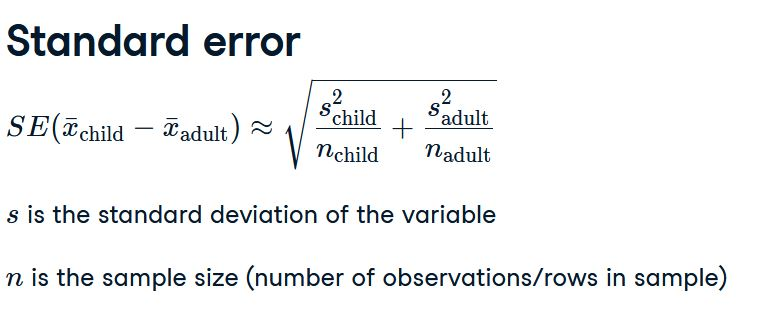

In [38]:
from PIL import Image 
from IPython.display import display
img = Image. open('se.jpg')
display(img)

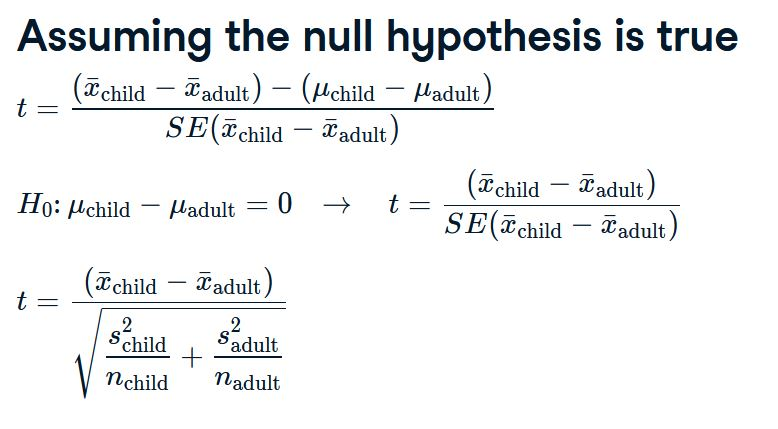

In [39]:
from PIL import Image 
from IPython.display import display
img = Image. open('null.jpg')
display(img)

In [40]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [44]:
xbar_child = xbar[1]
xbar_child

132419.5706214689

In [45]:
xbar_adult = xbar[0]
xbar_adult

111313.31104651163

In [41]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [42]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [47]:
import numpy as np
numerator = xbar_child - xbar_adult
numerator

21106.25957495728

In [48]:
denominator = np.sqrt(s[1]**2/n[1]+ s[0]**2/n[0])
denominator

11287.18430352594

In [49]:
t_stat = numerator/denominator
t_stat

1.8699313316221844

In [54]:
degrees_of_freedom = n[1]-1+n[0]-1
# total number of obeservation minus 1 per each sample

In [55]:
from scipy.stats import t
p_value_t = 1-t.cdf(t_stat,degrees_of_freedom,0,1)
p_value_t

0.030811302165157595

In [56]:
alpha = 0.1
p_value_t <= alpha

True

### Reject Ho in favor of Ha

# 3. Paired t-tests
Paired sample t-test is a statistical technique that is used to compare two population means in the case of two samples that are correlated.

In [60]:
sample_data = pd.read_feather('data/repub_votes_potus_08_12.feather')
sample_data.head()

state   county  repub_percent_08  repub_percent_12
0     Alabama     Hale         38.957877         37.139882
1    Arkansas   Nevada         56.726272         58.983452
2  California     Lake         38.896719         39.331367
3  California  Ventura         42.923190         45.250693
4    Colorado  Lincoln         74.522569         73.764757

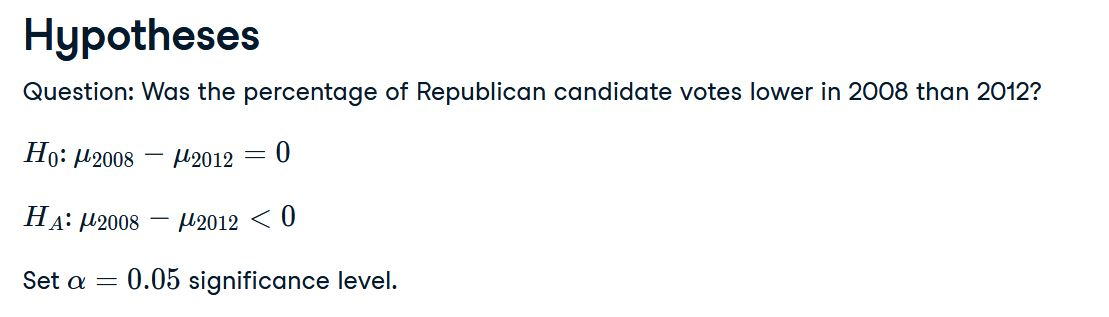

In [59]:
from PIL import Image 
from IPython.display import display
img = Image. open('pair.jpg')
display(img)

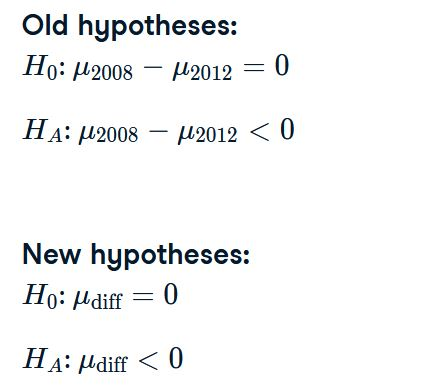

In [65]:
from PIL import Image 
from IPython.display import display
img = Image. open('diff.jpg')
display(img)

In [61]:
sample_data['diff']= sample_data['repub_percent_08'] - sample_data['repub_percent_12']

<Axes: >

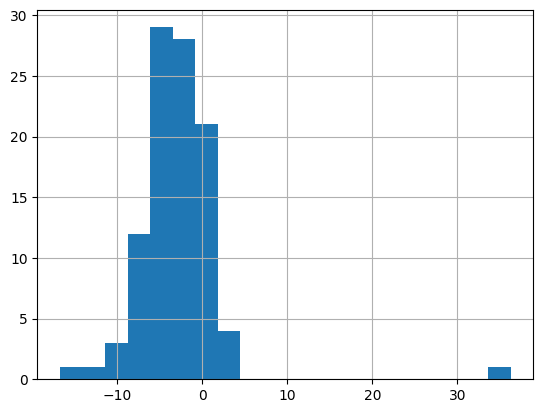

In [62]:
sample_data['diff'].hist(bins=20)

In [64]:
xbar_diff =sample_data['diff'].mean()
xbar_diff

-2.877109041242944

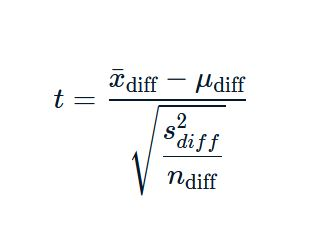

In [66]:
from PIL import Image 
from IPython.display import display
img = Image. open('t_diff.jpg')
display(img)

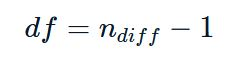

In [67]:
from PIL import Image 
from IPython.display import display
img = Image. open('degre_of_fredom.jpg')
display(img)

In [68]:
n_diff = len(sample_data)
n_diff

100

In [69]:
s_diff = sample_data['diff'].std()
s_diff

5.136737887231852

In [70]:
t_stat = (xbar_diff-0)/np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928489

In [71]:
degrees_of_freedom = n_diff-1
degrees_of_freedom

99

In [72]:
p_value = t.cdf(t_stat,degrees_of_freedom)
p_value

9.572537285272411e-08

#### package for t-test

In [75]:
import pingouin
# y specifies the hypothesized difference value from the null hypothesis
# alternative = 'two-sides', 'less', 'greater'
pingouin.ttest(x = sample_data['diff'], y = 0, alternative = 'less')

T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.560104   

             BF10     power  
T-test  1.323e+05  0.999955

In [76]:
# easy variation of paired t-test
pingouin.ttest(x = sample_data['repub_percent_08'], y = sample_data['repub_percent_12'], paired = True, alternative = 'less')

T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.217364   

             BF10     power  
T-test  1.323e+05  0.696338

# 4. ANOVA tests

ANOVA tests determine whether there are differences between the groups.

We want to know if mean annual compensation is different for each of the levels of job satisfaction. 

In [77]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

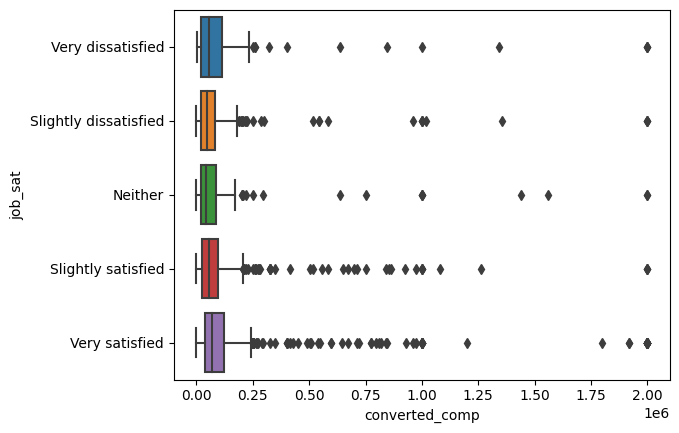

In [79]:
import seaborn as sns
sns.boxplot(x = 'converted_comp', y = 'job_sat', data =stack_overflow )
plt.show()

In [80]:
alpha = 0.2

In [90]:
g = pingouin.anova(data = stack_overflow, dv = 'converted_comp', between = 'job_sat')
g

Source  ddof1  ddof2         F     p-unc       np2
0  job_sat      4   2256  4.480485  0.001315  0.007882

In [91]:
g['p-unc'] < alpha

0    True
Name: p-unc, dtype: bool

The p-value is stored in the p-unc column, which is 0.0013, which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have significant differences between their compensation levels, but this doesn't tell us which two categories they are. 

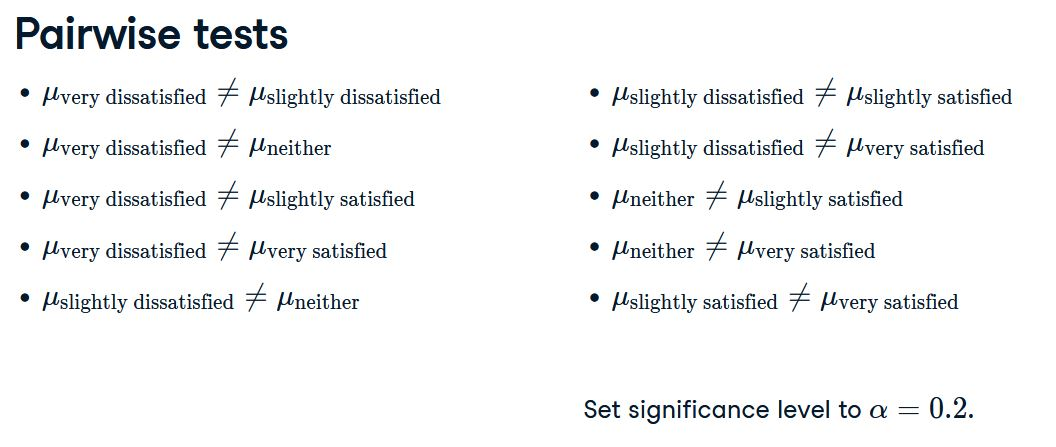

In [92]:
from PIL import Image 
from IPython.display import display
img = Image. open('anova.jpg')
display(img)

In [93]:
pt = pingouin.pairwise_tests(data = stack_overflow, dv = 'converted_comp', between = 'job_sat', padjust = 'None')
pt

Contrast                   A                      B  Paired  Parametric  \
0  job_sat  Slightly satisfied         Very satisfied   False        True   
1  job_sat  Slightly satisfied                Neither   False        True   
2  job_sat  Slightly satisfied      Very dissatisfied   False        True   
3  job_sat  Slightly satisfied  Slightly dissatisfied   False        True   
4  job_sat      Very satisfied                Neither   False        True   
5  job_sat      Very satisfied      Very dissatisfied   False        True   
6  job_sat      Very satisfied  Slightly dissatisfied   False        True   
7  job_sat             Neither      Very dissatisfied   False        True   
8  job_sat             Neither  Slightly dissatisfied   False        True   
9  job_sat   Very dissatisfied  Slightly dissatisfied   False        True   

          T          dof alternative     p-unc     BF10    hedges  
0 -4.009935  1478.622799   two-sided  0.000064  158.564 -0.192931  
1 -0.700752   258.204546   two-sided  0.484088    0.114 -0.068513  
2 -1.243665   187.153329   two-sided  0.215179    0.208 -0.145624  
3 -0.038264   569.926329   two-sided  0.969491    0.074 -0.002719  
4  1.662901   328.326639   two-sided  0.097286    0.337  0.120115  
5  0.747379   221.666205   two-sided  0.455627    0.126  0.063479  
6  3.076222   821.303063   two-sided  0.002166     7.43  0.173247  
7 -0.545948   321.165726   two-sided  0.585481    0.135 -0.058537  
8  0.602209   367.730081   two-sided  0.547406    0.118  0.055707  
9  1.129951   247.570187   two-sided  0.259590    0.197  0.119131

In [95]:
# adjusting the p-values
pt_bonf = pingouin.pairwise_tests(data = stack_overflow, dv = 'converted_comp', between = 'job_sat', padjust = 'bonf')
pt_bonf

Contrast                   A                      B  Paired  Parametric  \
0  job_sat  Slightly satisfied         Very satisfied   False        True   
1  job_sat  Slightly satisfied                Neither   False        True   
2  job_sat  Slightly satisfied      Very dissatisfied   False        True   
3  job_sat  Slightly satisfied  Slightly dissatisfied   False        True   
4  job_sat      Very satisfied                Neither   False        True   
5  job_sat      Very satisfied      Very dissatisfied   False        True   
6  job_sat      Very satisfied  Slightly dissatisfied   False        True   
7  job_sat             Neither      Very dissatisfied   False        True   
8  job_sat             Neither  Slightly dissatisfied   False        True   
9  job_sat   Very dissatisfied  Slightly dissatisfied   False        True   

          T          dof alternative     p-unc    p-corr p-adjust     BF10  \
0 -4.009935  1478.622799   two-sided  0.000064  0.000638     bonf  158.564   
1 -0.700752   258.204546   two-sided  0.484088  1.000000     bonf    0.114   
2 -1.243665   187.153329   two-sided  0.215179  1.000000     bonf    0.208   
3 -0.038264   569.926329   two-sided  0.969491  1.000000     bonf    0.074   
4  1.662901   328.326639   two-sided  0.097286  0.972864     bonf    0.337   
5  0.747379   221.666205   two-sided  0.455627  1.000000     bonf    0.126   
6  3.076222   821.303063   two-sided  0.002166  0.021659     bonf     7.43   
7 -0.545948   321.165726   two-sided  0.585481  1.000000     bonf    0.135   
8  0.602209   367.730081   two-sided  0.547406  1.000000     bonf    0.118   
9  1.129951   247.570187   two-sided  0.259590  1.000000     bonf    0.197   

     hedges  
0 -0.192931  
1 -0.068513  
2 -0.145624  
3 -0.002719  
4  0.120115  
5  0.063479  
6  0.173247  
7 -0.058537  
8  0.055707  
9  0.119131

# Proportion Tests

# 5. One-sample proportion tests

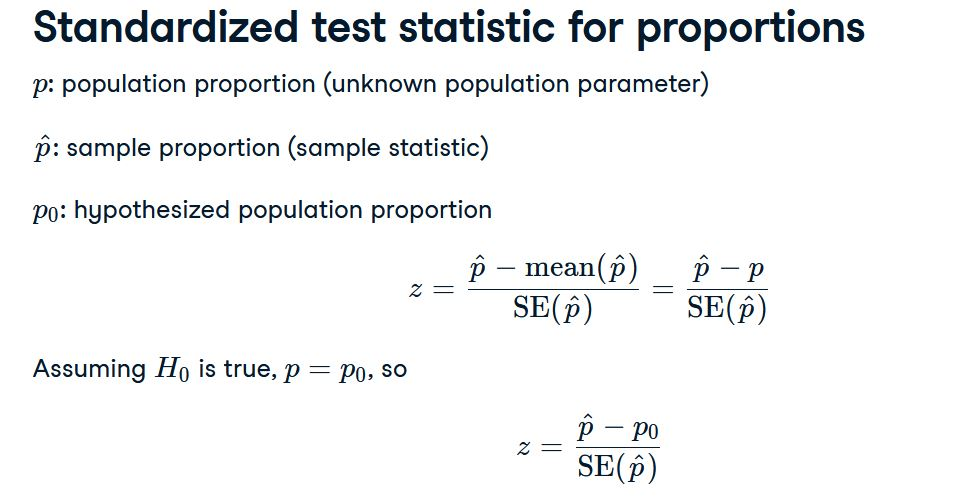

In [98]:
from PIL import Image 
from IPython.display import display
img = Image. open('sample.jpg')
display(img)

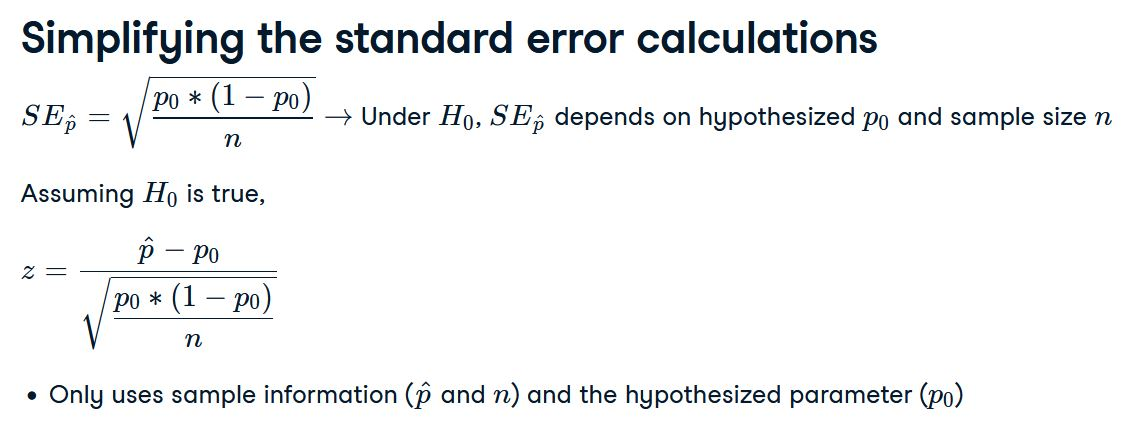

In [97]:
from PIL import Image 
from IPython.display import display
img = Image. open('see.jpg')
display(img)

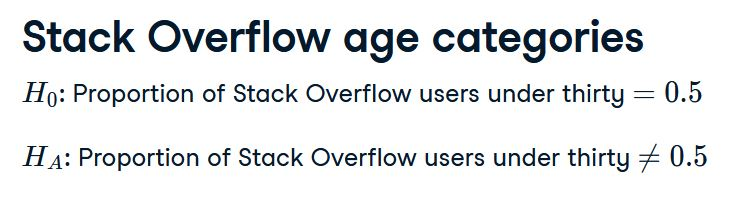

In [99]:
from PIL import Image 
from IPython.display import display
img = Image. open('age.jpg')
display(img)

In [101]:
alpha = 0.01

In [103]:
# sample
stack_overflow['age_cat'].value_counts(normalize = True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [104]:
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
p_hat

0.5356037151702786

In [105]:
p_0 = 0.5

In [107]:
n = len(stack_overflow)
n

2261

In [108]:
numerator = p_hat- p_0
denominator = np.sqrt(p_0* (1-p_0)/n)
z_score = numerator/denominator
z_score

3.385911440783663

In [110]:
p_value_left_tailed = norm.cdf(z_score)
p_value_left_tailed

0.999645288631595

In [112]:
p_value_right_tailed = 1 - norm.cdf(z_score)
p_value_right_tailed

0.00035471136840503625

In [113]:
p_value_two_tailed = norm.cdf(-z_score) + 1 - norm.cdf(z_score)
p_value_two_tailed

0.0007094227368100725

In [115]:
p_value_two_tailed <= alpha

True

Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, concluding that the proportion of users under thirty is not equal to point-five. 

# 6. Two-sample proportion tests

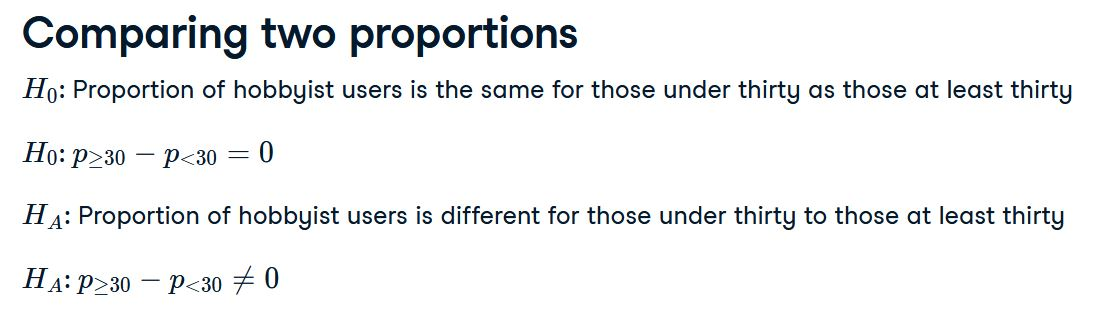

In [116]:
from PIL import Image 
from IPython.display import display
img = Image. open('two.jpg')
display(img)

In [117]:
alpha = 0.05

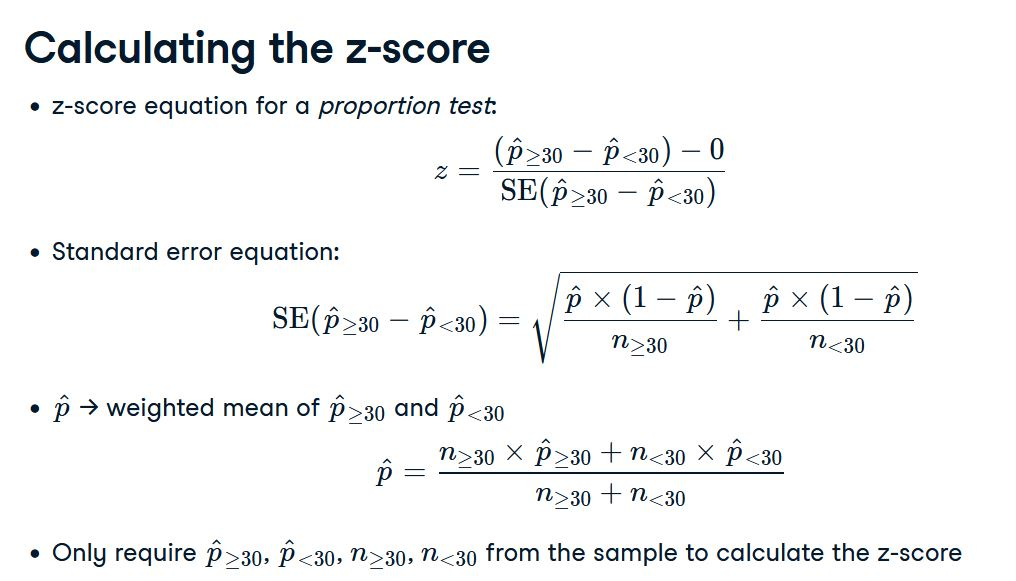

In [118]:
from PIL import Image 
from IPython.display import display
img = Image. open('proportion.jpg')
display(img)

In [120]:
p_hats  = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize = True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [121]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [132]:
p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_under_30 = p_hats[('Under 30', 'Yes')]
print(p_hats_at_least_30, p_hats_under_30)

0.7733333333333333 0.8431048720066061


In [133]:
n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

1050 1211


In [134]:
p_hat = (n_at_least_30*p_hat_at_least_30 + n_under_30*p_hat_under_30)/(n_at_least_30+n_under_30)
std_error = np.sqrt(p_hat*(1-p_hat)/n_at_least_30+p_hat*(1-p_hat)/n_under_30)

In [135]:
z_score  = (p_hat_at_least_30- p_hat_under_30)/std_error
z_score

-4.223691463320559

In [136]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [138]:
# proportions_ztest()
n_hobbyists = np.array([812,1021])
n_rows = np.array([812+238,1021+190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count = n_hobbyists, nobs = n_rows, alternative = 'two-sided')
print(z_score, p_value)

-4.223691463320559 2.403330142685068e-05


The p-value is smaller than the five percent significance level we specified, so we can conclude that there is a difference in the proportion of hobbyists between the two age groups. 

# 7. Chi-square test

In [141]:
expected, observed, stats = pingouin.chi2_independence(data =stack_overflow, x = 'hobbyist', y ='age_cat', correction = False )
stats

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694

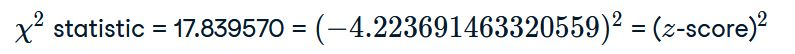

In [146]:
from PIL import Image 
from IPython.display import display
img = Image. open('stat.jpg')
display(img)

In [142]:
stack_overflow['age_cat'].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [143]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

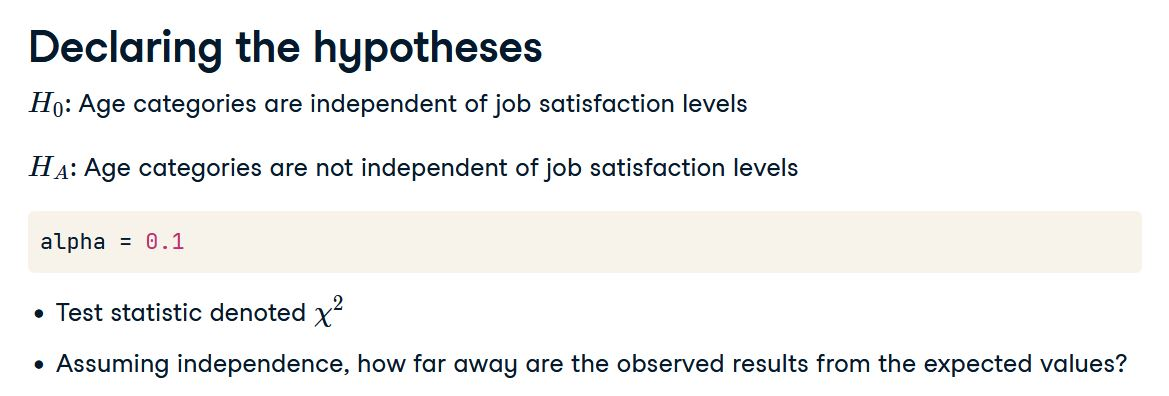

In [144]:
from PIL import Image 
from IPython.display import display
img = Image. open('chi.jpg')
display(img)

In [145]:
alpha = 0.1

In [148]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64

In [149]:
wide_props = props.unstack()
wide_props

age_cat                At least 30  Under 30
job_sat                                     
Very dissatisfied         0.490566  0.509434
Slightly dissatisfied     0.467836  0.532164
Neither                   0.432836  0.567164
Slightly satisfied        0.435294  0.564706
Very satisfied            0.488055  0.511945

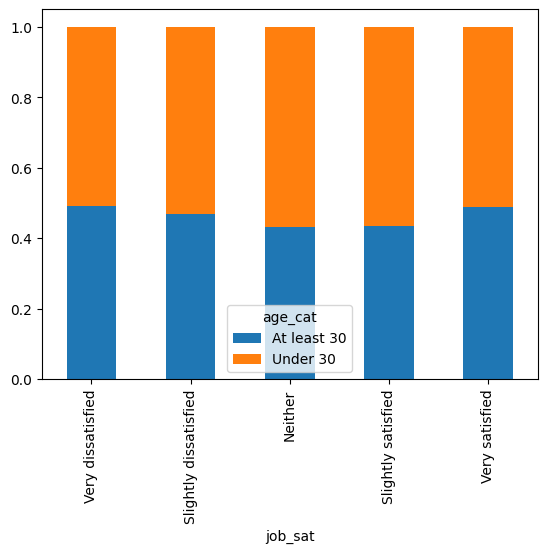

In [150]:
wide_props.plot(kind='bar', stacked = True)
plt.show()

In [153]:
expected, observed, stats = pingouin.chi2_independence(data =stack_overflow, x = 'job_sat', y ='age_cat', correction = True )
stats

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419

### Degrees of freedom
df = (r-1)(c-1) <br />
df = (5-1)(2-1) = 4 <br />
When the sample size is very small correction = True

The p-value is 0.23, which is above the significance level we set, so we conclude that age categories are independent of job satisfaction. 

Fail to reject the null hypothesis and conclude that job_sat and age_cat are independent.

## Swaped categories

In [154]:
props_swapped = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
props_swapped

age_cat      job_sat              
At least 30  Very satisfied           0.408571
             Slightly satisfied       0.281905
             Slightly dissatisfied    0.152381
             Neither                  0.082857
             Very dissatisfied        0.074286
Under 30     Very satisfied           0.371594
             Slightly satisfied       0.317093
             Slightly dissatisfied    0.150289
             Neither                  0.094137
             Very dissatisfied        0.066887
Name: job_sat, dtype: float64

In [155]:
wide_props_swapped = props_swapped.unstack()
wide_props_swapped

job_sat      Very satisfied  Slightly satisfied  Slightly dissatisfied  \
age_cat                                                                  
At least 30        0.408571            0.281905               0.152381   
Under 30           0.371594            0.317093               0.150289   

job_sat       Neither  Very dissatisfied  
age_cat                                   
At least 30  0.082857           0.074286  
Under 30     0.094137           0.066887

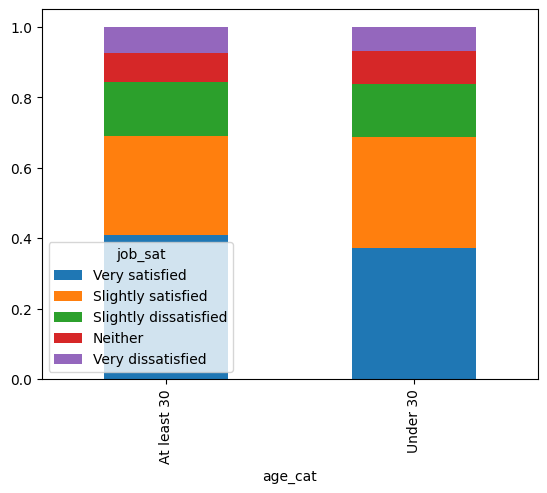

In [156]:
wide_props_swapped.plot(kind='bar', stacked = True)
plt.show()

In [159]:
expected, observed, stats = pingouin.chi2_independence(data =stack_overflow, x = 'age_cat', y ='job_sat', correction = True )
stats[stats['test']=='pearson']

test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.552373  4.0  0.235164  0.049555  0.437417

If we run the chi-square test with the variables swapped, then the results are identical. 

### Chi-square goodness of fit tests

The one-sample chi-square test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data.

In [160]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [161]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
purple_link_counts

purple_link     n
2             Amused   368
3            Annoyed   263
0  Hello, old friend  1225
1        Indifferent   405

In [162]:
hypothesized = pd.DataFrame({
    'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop': [1/6, 1/6, 1/2, 1/6]
})
hypothesized

purple_link      prop
0             Amused  0.166667
1            Annoyed  0.166667
2  Hello, old friend  0.500000
3        Indifferent  0.166667

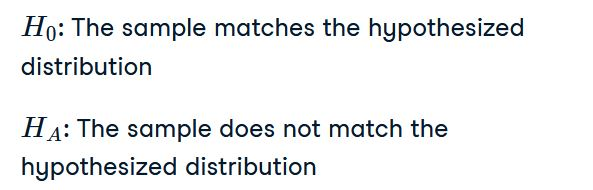

In [163]:
from PIL import Image 
from IPython.display import display
img = Image. open('hip.jpg')
display(img)

In [164]:
alpha = 0.1

In [165]:
n_total = len(stack_overflow)

In [166]:
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333

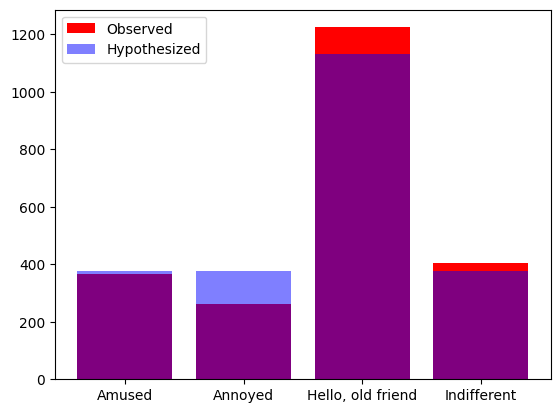

In [169]:
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color = 'red', label = 'Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha = 0.5, color = 'blue', label = 'Hypothesized')
plt.legend()
plt.show()

In [170]:
from scipy.stats import chisquare
chisquare(f_obs =purple_link_counts['n'], f_exp =hypothesized['n'] )

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

The p-value returned by the function is very small, much lower than the significance level of point-zero-one, so we conclude that the sample distribution of proportions is different from the hypothesized distribution.

# ******************* Non-Parametric Tests *******************

f the normality is unclear from the plot, you can run a test of normality, such as a Kolmogorov–Smirnov test or the Shapiro–Wilk test.

In [196]:
repub_votes_potus = sample_data
repub_votes_small = repub_votes_potus.sample(5)
repub_votes_small

state     county  repub_percent_08  repub_percent_12      diff
33    Kentucky     Powell         57.059533         61.727293 -4.667760
2   California       Lake         38.896719         39.331367 -0.434648
17    Illinois     Menard         56.806931         64.184685 -7.377755
23        Iowa  Appanoose         49.967617         50.616493 -0.648877
64        Ohio      Noble         55.897602         60.677793 -4.780191

In [197]:
alpha = 0.01
# ttest requires minimum 30 samples
pingouin.ttest(repub_votes_small['repub_percent_08'],repub_votes_small['repub_percent_12'], paired = True, alternative = 'less' )

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -2.6873    4        less  0.027406  [-inf, -0.74]  0.392731  4.157   

           power  
T-test  0.181911

If we are not sure if the sample follow the normal distribution especially with only 5 values, we should do non parametric test

In [198]:
# ranks of data
x = [1,15,3,10,6]

In [199]:
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

## Kolmogorov–Smirnov test

In [2]:
from numpy.random import seed
from numpy.random import poisson

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(data, 'norm')

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170287e-103, statistic_location=2, statistic_sign=-1)

From the output we can see that the test statistic is 0.9072 and the corresponding p-value is 1.0908e-103. Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

- https://www.statology.org/kolmogorov-smirnov-test-python/
- https://www.statology.org/shapiro-wilk-test-python/

## 1. Wilcoxon-signed rank test (paired - ttest paired)

In [200]:
# First, we take the differences in the paired values.
repub_votes_small['diff'] = repub_votes_small['repub_percent_08']-repub_votes_small['repub_percent_12']

In [201]:
# Next, we take the absolute value of the differences
repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
repub_votes_small

state     county  repub_percent_08  repub_percent_12      diff  \
33    Kentucky     Powell         57.059533         61.727293 -4.667760   
2   California       Lake         38.896719         39.331367 -0.434648   
17    Illinois     Menard         56.806931         64.184685 -7.377755   
23        Iowa  Appanoose         49.967617         50.616493 -0.648877   
64        Ohio      Noble         55.897602         60.677793 -4.780191   

    abs_diff  
33  4.667760  
2   0.434648  
17  7.377755  
23  0.648877  
64  4.780191

In [202]:
# Then, we rank these absolute differences
from scipy.stats import rankdata
repub_votes_small['rank_abs_diff']=rankdata(repub_votes_small['abs_diff'])
repub_votes_small

state     county  repub_percent_08  repub_percent_12      diff  \
33    Kentucky     Powell         57.059533         61.727293 -4.667760   
2   California       Lake         38.896719         39.331367 -0.434648   
17    Illinois     Menard         56.806931         64.184685 -7.377755   
23        Iowa  Appanoose         49.967617         50.616493 -0.648877   
64        Ohio      Noble         55.897602         60.677793 -4.780191   

    abs_diff  rank_abs_diff  
33  4.667760            3.0  
2   0.434648            1.0  
17  7.377755            5.0  
23  0.648877            2.0  
64  4.780191            4.0

In [204]:
# Calculating a test statistic called W
T_minus = 3+1+5+2+4
T_plus = 0
W = np.min([T_minus,T_plus])
W

0

In [205]:
pingouin.wilcoxon(x = repub_votes_small['repub_percent_08'],
                  y = repub_votes_small['repub_percent_12'],
                  alternative = 'less' )

W-val alternative    p-val  RBC  CLES
Wilcoxon    0.0        less  0.03125 -1.0  0.72

Fail to reject Ho, since 0.03 > 0.01 <br/>
The Wilcoxon test indicates that we do not have evidence that the 2008 Republican percentages are smaller than the 2012 percentages using this small sample of five rows. 

## 2. Wilcoxon-Mann-Whitney test (unpaired)

In [206]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp.head()

converted_comp age_first_code_cut
0         77556.0              adult
1         74970.0              child
2        594539.0              child
3       2000000.0              adult
4         37816.0              adult

In [208]:
age_vs_comp_wide = age_vs_comp.pivot(columns ='age_first_code_cut', values = 'converted_comp')
age_vs_comp_wide.head()

age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN

In [209]:
alpha = 0.01

In [213]:
pingouin.mwu(x = age_vs_comp_wide['child'],
                  y = age_vs_comp_wide['adult'],
                  alternative = 'greater' )

U-val alternative         p-val       RBC      CLES
MWU  744365.5     greater  1.902723e-19 -0.222516  0.611258

## 3. Kruskal-Wallis test
In the same way that ANOVA extends t-tests to more than two groups, the Kruskal-Wallis test extends the Wilcoxon-Mann-Whitney test to more than two groups. That is, the Kruskal-Wallis test is a non-parametric version of ANOVA.

In [214]:
pingouin.kruskal(data = stack_overflow,
                 dv = 'converted_comp',
                  between = 'job_sat' )

Source  ddof1          H         p-unc
Kruskal  job_sat      4  72.814939  5.772915e-15

 Again, the p-value here is very small and smaller than our significance level. This provides evidence that at least one of the mean compensation totals is different than the others across these five job satisfaction groups.